### AJAYI ABDULMALIK , AJAYI TIMILEYIN

<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg" alt="Random Forest Logo" width="400" height="400">



 


### Import  required libraries:


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline 

from scipy import stats
import joblib

### Reading a portion of our data:

In [2]:
data = pd.read_csv('shuffled.csv')
data.head()

,T1,H1,S1,G1,F1,T2,H2,S2,G2,F2,...,H3,S3,G3,F3,T4,H4,S4,G4,F4,CLASS_LABEL
0,29.11,71.40,0.0,0.0,0.0,29.54,68.48,0.0,0.0,0.0,...,67.09,0.0,58.0,0.0,32.84,63.81,0.0,0.0,0.0,0.0
1,40.49,50.47,0.0,0.0,0.0,41.45,41.83,0.0,0.0,0.0,...,44.87,0.0,7.0,0.0,44.50,36.30,0.0,11.0,0.0,1.0
2,28.93,71.79,0.0,0.0,0.0,29.17,68.45,0.0,0.0,0.0,...,68.76,0.0,59.0,0.0,32.13,63.75,0.0,0.0,0.0,0.0
3,32.08,60.59,0.0,16.0,0.0,62.17,57.22,0.0,265.0,0.0,...,62.77,0.0,26.0,0.0,32.69,16.28,0.0,23.0,0.0,1.0
4,33.49,57.16,0.0,17.0,0.0,60.46,52.44,0.0,0.0,0.0,...,57.40,0.0,33.0,0.0,33.47,16.88,0.0,39.0,0.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4664 entries, 0 to 4663
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T1           4664 non-null   float64
 1   H1           4664 non-null   float64
 2   S1           4664 non-null   float64
 3   G1           4664 non-null   float64
 4   F1           4664 non-null   float64
 5   T2           4664 non-null   float64
 6   H2           4664 non-null   float64
 7   S2           4664 non-null   float64
 8   G2           4664 non-null   float64
 9   F2           4664 non-null   float64
 10  T3           4664 non-null   float64
 11  H3           4664 non-null   float64
 12  S3           4664 non-null   float64
 13  G3           4664 non-null   float64
 14  F3           4664 non-null   float64
 15  T4           4664 non-null   float64
 16  H4           4664 non-null   float64
 17  S4           4664 non-null   float64
 18  G4           4664 non-null   float64
 19  F4    

The "Non-Null Count" column shows the number of non-null entries so there are no missing enteries, we also have 25 features. We have 24 float 64, 1 int 64 and 1 object

The distribution of our class_label

### Data Preprocessing:
we have a null value in humidity 1:

In [4]:
data['H1'].fillna(data['H1'].mode()[0], inplace=True)


In [5]:
# data.dropna(inplace = True)

In [6]:
data['H1'].describe()

count    4664.000000
mean       60.895075
std        11.156578
min        15.420000
25%        55.020000
50%        67.890000
75%        68.290000
max        73.930000
Name: H1, dtype: float64

In [7]:
data['CLASS_LABEL'].describe()

count    4664.000000
mean        0.508576
std         0.499980
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CLASS_LABEL, dtype: float64

we can see that from our minimum value up to our 50th percentile. Its thesame with  the  75% percentile to maximum value.This means are data is normally distributed 

## Correlations:
Its important to establish correlation between the response variable and predictor variable so as to determiine which variables are important in our prediction :

---Pearson correlation coefficient: Since most of our values are numerical attributes it will select only numerical attributes.

In [8]:
class_label = data.select_dtypes(include = ['float64','int64'])
class_label_corr =class_label.corr()['CLASS_LABEL'][:-1]
top_features  = class_label_corr[abs(class_label_corr) > 0.4].sort_values(ascending = False)
print('There is {} strongly correlated values with class label:\n{}'.format(len(top_features),top_features))

There is 10 strongly correlated values with class label:
T1    0.700230
T2    0.665280
T3    0.663437
G4    0.584766
T4    0.568092
F3    0.428860
H1   -0.691011
H3   -0.699925
G3   -0.718052
H2   -0.725996
Name: CLASS_LABEL, dtype: float64


C:\Users\taimoor\AppData\Local\Temp\ipykernel_7200\454114196.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  data_untransformed = sns.distplot(data['CLASS_LABEL'])


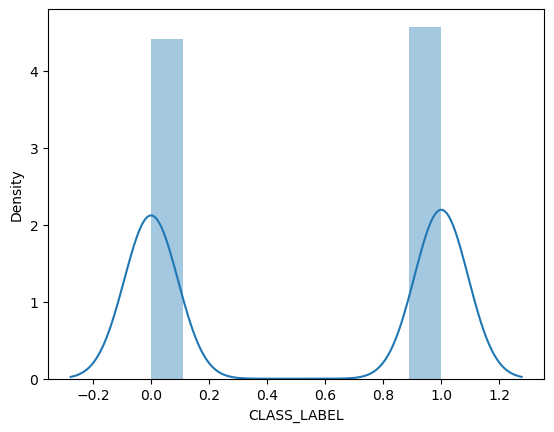

In [9]:
data_untransformed = sns.distplot(data['CLASS_LABEL'])

This graph shows there are more data under class 1 variables than 0 , its a multinoulli distribution.Also the negative skewness below tells the same.

In [10]:
print('skweness:%f'%data['CLASS_LABEL'].skew())

skweness:-0.034321


### Handling Outliers:

The otliers are the observation point that is distant from other observations.

### Uni- variate Analysis

A box plot is a method for graphically depecting groups of numerical data through their quartiles. Box plot hav elines extending vertically from the boxes(whiskers)indicating variability outside the upper and lower quartiles.
The outliers can be spotted as individual points

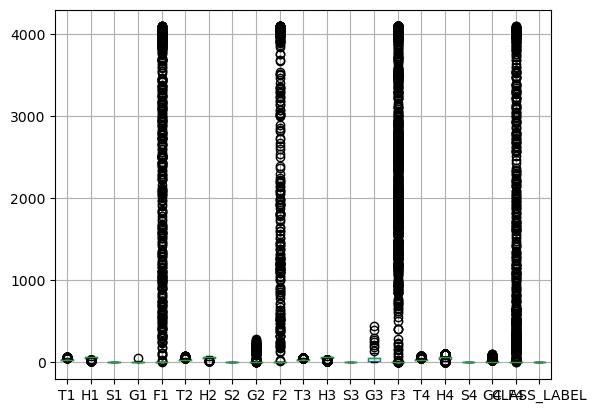

In [11]:
data.boxplot()
plt.show()

we dont really have outliers in our data

In [12]:
from scipy import stats
# df = data.drop('DATE and Time', axis = 1)
z_scores = stats.zscore(class_label)

Q1 = class_label.quantile(0.25)
Q3 = class_label.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = class_label[(class_label < lower_bound) | (class_label > upper_bound)]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4664 entries, 0 to 4663
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T1           90 non-null     float64
 1   H1           152 non-null    float64
 2   S1           0 non-null      float64
 3   G1           1 non-null      float64
 4   F1           443 non-null    float64
 5   T2           213 non-null    float64
 6   H2           51 non-null     float64
 7   S2           0 non-null      float64
 8   G2           139 non-null    float64
 9   F2           258 non-null    float64
 10  T3           318 non-null    float64
 11  H3           356 non-null    float64
 12  S3           0 non-null      float64
 13  G3           8 non-null      float64
 14  F3           915 non-null    float64
 15  T4           268 non-null    float64
 16  H4           561 non-null    float64
 17  S4           0 non-null      float64
 18  G4           379 non-null    float64
 19  F4    

<Axes: >

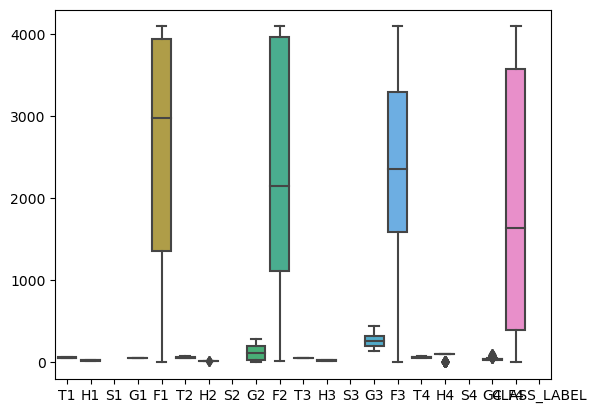

In [13]:
sns.boxplot(outliers)

In [14]:
data['CLASS_LABEL'].value_counts()

1.0    2372
0.0    2292
Name: CLASS_LABEL, dtype: int64

In [15]:
data['CLASS_LABEL'].value_counts(normalize = True)

1.0    0.508576
0.0    0.491424
Name: CLASS_LABEL, dtype: float64


Also Random Forest is robust to outliers and irrelevant features because it's an ensemble of decision trees, and it relies on the consensus of multiple trees, making it less sensitive to preprocessing compared to individual models.

In [15]:
import pandas as pd

# Assuming class_label contains your data
# class_label = ...  # Your data goes here

# Define a mapping of column names to new names
column_mapping = {
    'T1': 'Temperature1', 'L1': 'Light1', 'G1': 'Gas1', 'S1': 'Smoke1', 'H1': 'Humidity1', 'F1': 'Flame1',
    'T2': 'Temperature2', 'L2': 'Light2', 'G2': 'Gas2', 'S2': 'Smoke2', 'H2': 'Humidity2', 'F2': 'Flame2',
    'T3': 'Temperature3', 'L3': 'Light3', 'G3': 'Gas3', 'S3': 'Smoke3', 'H3': 'Humidity3', 'F3': 'Flame3',
    'T4': 'Temperature4', 'L4': 'Light4', 'G4': 'Gas4', 'S4': 'Smoke4', 'H4': 'Humidity4', 'F4': 'Flame4'
}

# Rename the columns in the DataFrame
class_label = class_label.rename(columns=column_mapping)

# Print the DataFrame with renamed columns
print(class_label)


      Temperature1  Humidity1  Smoke1  Gas1  Flame1  Temperature2  Humidity2  \
0            29.11      71.40     0.0   0.0     0.0         29.54      68.48   
1            40.49      50.47     0.0   0.0     0.0         41.45      41.83   
2            28.93      71.79     0.0   0.0     0.0         29.17      68.45   
3            32.08      60.59     0.0  16.0     0.0         62.17      57.22   
4            33.49      57.16     0.0  17.0     0.0         60.46      52.44   
...            ...        ...     ...   ...     ...           ...        ...   
4659         38.99      54.41     0.0   0.0     0.0         40.60      43.97   
4660         30.45      67.77     0.0   7.0     0.0         29.98      68.54   
4661         30.45      68.30     0.0   8.0     0.0         30.00      68.91   
4662         30.50      68.36     0.0  10.0     0.0         30.04      69.20   
4663         30.38      67.80     0.0   9.0     0.0         29.92      68.49   

      Smoke2   Gas2  Flame2  ...  Humid

In [16]:
class_label

,Temperature1,Humidity1,Smoke1,Gas1,Flame1,Temperature2,Humidity2,Smoke2,Gas2,Flame2,...,Humidity3,Smoke3,Gas3,Flame3,Temperature4,Humidity4,Smoke4,Gas4,Flame4,CLASS_LABEL
0,29.11,71.40,0.0,0.0,0.0,29.54,68.48,0.0,0.0,0.0,...,67.09,0.0,58.0,0.0,32.84,63.81,0.0,0.0,0.0,0.0
1,40.49,50.47,0.0,0.0,0.0,41.45,41.83,0.0,0.0,0.0,...,44.87,0.0,7.0,0.0,44.50,36.30,0.0,11.0,0.0,1.0
2,28.93,71.79,0.0,0.0,0.0,29.17,68.45,0.0,0.0,0.0,...,68.76,0.0,59.0,0.0,32.13,63.75,0.0,0.0,0.0,0.0
3,32.08,60.59,0.0,16.0,0.0,62.17,57.22,0.0,265.0,0.0,...,62.77,0.0,26.0,0.0,32.69,16.28,0.0,23.0,0.0,1.0
4,33.49,57.16,0.0,17.0,0.0,60.46,52.44,0.0,0.0,0.0,...,57.40,0.0,33.0,0.0,33.47,16.88,0.0,39.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,38.99,54.41,0.0,0.0,0.0,40.60,43.97,0.0,0.0,0.0,...,46.00,0.0,12.0,0.0,48.06,32.49,0.0,0.0,1251.0,1.0
4660,30.45,67.77,0.0,7.0,0.0,29.98,68.54,0.0,0.0,0.0,...,66.53,0.0,53.0,0.0,32.89,64.33,0.0,0.0,0.0,0.0
4661,30.45,68.30,0.0,8.0,0.0,30.00,68.91,0.0,0.0,0.0,...,66.43,0.0,56.0,0.0,33.05,64.73,0.0,0.0,0.0,0.0
4662,30.50,68.36,0.0,10.0,0.0,30.04,69.20,0.0,0.0,0.0,...,66.45,0.0,58.0,0.0,33.09,64.93,0.0,0.0,0.0,0.0


In [17]:
round(class_label.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Temperature1,4664.0,34.77,5.89,28.77,30.48,32.53,37.95,70.67
Humidity1,4664.0,60.90,11.16,15.42,55.02,67.89,68.29,73.93
Smoke1,4664.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Gas1,4664.0,5.86,5.99,0.00,0.00,6.00,10.00,53.00
Flame1,4664.0,250.77,874.30,0.00,0.00,0.00,0.00,4095.00
Temperature2,4664.0,35.57,7.83,28.62,30.01,32.88,39.79,72.98
Humidity2,4664.0,59.80,12.47,18.54,51.16,68.41,69.02,74.41
Smoke2,4664.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Gas2,4664.0,3.60,25.27,0.00,0.00,0.00,0.00,281.00
Flame2,4664.0,129.11,627.04,0.00,0.00,0.00,0.00,4095.00


## Feature Correlation:

--- An HeatMap shows correlation between features.Very light indicates high positive correlation and while dark indicates high negative correlation.

<Axes: >

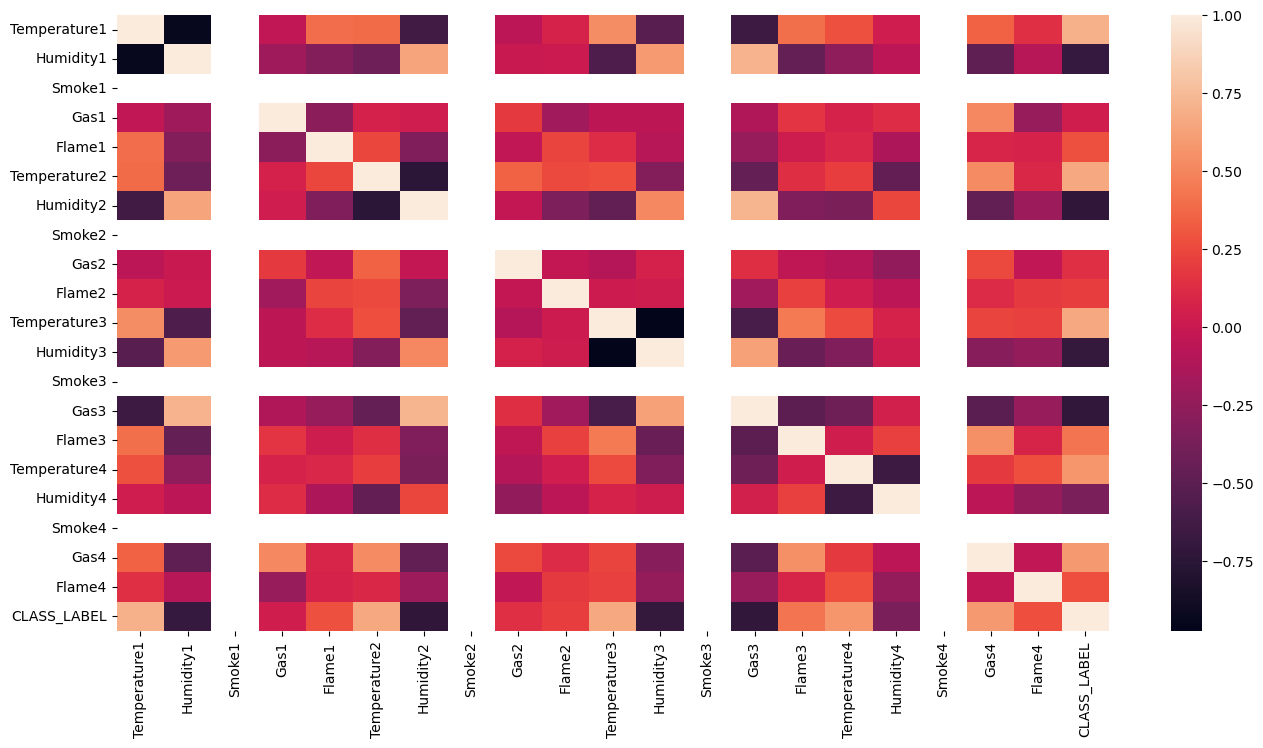

In [18]:
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(class_label.corr())

we see that we have to drop smoke1,2,3,4, also gas 2 but since random forest is insensitive to this we will proceed without droping them:

## Examing Target and preprocessing :

* Examine the distribution of the target('CLass_label')
* Split the data into train and test sets.Decide if stratisfied split should be used based on the distribution.
* Examine the distribution of the predictor variable in the train and test dataset.


Stratified splitting is a method of dividing a dataset into train and test sets such that the proportions of different classes or categories in the original dataset are preserved in both sets to ensure a representative sample for model evaluation.


In [19]:
# renaming the data to avoid confusion:
RF_df  = class_label
target = 'CLASS_LABEL'
RF_df[target].value_counts()

1.0    2372
0.0    2292
Name: CLASS_LABEL, dtype: int64

In [20]:
RF_df[target].value_counts(normalize = True)

1.0    0.508576
0.0    0.491424
Name: CLASS_LABEL, dtype: float64

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data with 1300 test points in the test data
#This creates a generator

feature_cols =[x for x in RF_df.columns if x != target ]


# next is used to iterate
strat_shuffle_split = StratifiedShuffleSplit(n_splits = 1, test_size=0.30, random_state= 42 )
train_idx,test_idx = next(strat_shuffle_split.split(RF_df[feature_cols],RF_df[target]))

#Get the index value from the genarator
x_train = RF_df.loc[train_idx, feature_cols]
y_train = RF_df.loc[train_idx, target]

x_test = RF_df.loc[test_idx, feature_cols]
y_test = RF_df.loc[test_idx, target]

C:\Users\taimoor\AppData\Local\Temp\ipykernel_4436\1556141937.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_test)


<Axes: ylabel='Density'>

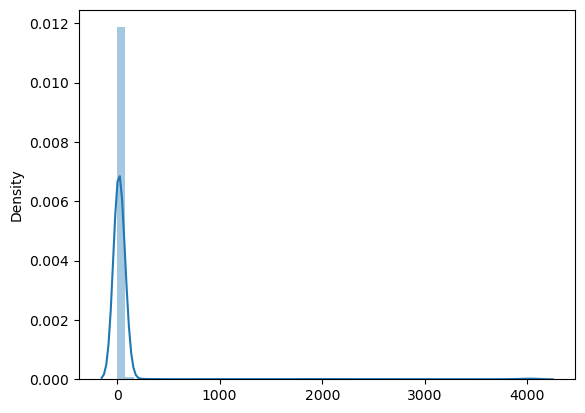

In [22]:
sns.distplot(x_test)

In [23]:
x_test

,Temperature1,Humidity1,Smoke1,Gas1,Flame1,Temperature2,Humidity2,Smoke2,Gas2,Flame2,Temperature3,Humidity3,Smoke3,Gas3,Flame3,Temperature4,Humidity4,Smoke4,Gas4,Flame4
658,38.01,60.38,0.0,0.0,0.0,49.05,30.30,0.0,0.0,3002.0,37.65,57.04,0.0,14.0,0.0,40.43,48.27,0.0,13.0,0.0
4555,32.22,70.07,0.0,0.0,0.0,32.46,70.93,0.0,0.0,0.0,31.82,71.01,0.0,48.0,0.0,34.40,61.15,0.0,0.0,0.0
4402,30.46,68.26,0.0,0.0,0.0,30.05,68.99,0.0,0.0,0.0,30.61,66.39,0.0,54.0,0.0,33.06,64.79,0.0,0.0,0.0
2492,36.54,60.06,0.0,0.0,0.0,40.65,52.72,0.0,0.0,0.0,33.84,65.34,0.0,48.0,0.0,38.26,49.41,0.0,0.0,0.0
1791,39.04,54.24,0.0,0.0,0.0,40.36,44.69,0.0,0.0,0.0,41.46,44.60,0.0,11.0,0.0,47.35,34.12,0.0,0.0,3856.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,34.53,56.91,0.0,16.0,0.0,33.70,59.41,0.0,0.0,0.0,34.45,55.09,0.0,16.0,0.0,67.25,14.01,0.0,28.0,504.0
3514,45.21,45.79,0.0,0.0,3186.0,42.70,41.40,0.0,0.0,0.0,39.24,52.25,0.0,13.0,0.0,40.57,48.01,0.0,10.0,0.0
970,30.46,68.28,0.0,8.0,0.0,30.06,68.88,0.0,0.0,0.0,30.60,66.44,0.0,52.0,0.0,33.16,64.70,0.0,0.0,0.0
3743,30.45,68.29,0.0,10.0,0.0,30.00,68.92,0.0,0.0,0.0,30.60,66.44,0.0,54.0,0.0,33.06,64.72,0.0,0.0,0.0


In [24]:
RF_df

,Temperature1,Humidity1,Smoke1,Gas1,Flame1,Temperature2,Humidity2,Smoke2,Gas2,Flame2,...,Humidity3,Smoke3,Gas3,Flame3,Temperature4,Humidity4,Smoke4,Gas4,Flame4,CLASS_LABEL
0,29.11,71.40,0.0,0.0,0.0,29.54,68.48,0.0,0.0,0.0,...,67.09,0.0,58.0,0.0,32.84,63.81,0.0,0.0,0.0,0.0
1,40.49,50.47,0.0,0.0,0.0,41.45,41.83,0.0,0.0,0.0,...,44.87,0.0,7.0,0.0,44.50,36.30,0.0,11.0,0.0,1.0
2,28.93,71.79,0.0,0.0,0.0,29.17,68.45,0.0,0.0,0.0,...,68.76,0.0,59.0,0.0,32.13,63.75,0.0,0.0,0.0,0.0
3,32.08,60.59,0.0,16.0,0.0,62.17,57.22,0.0,265.0,0.0,...,62.77,0.0,26.0,0.0,32.69,16.28,0.0,23.0,0.0,1.0
4,33.49,57.16,0.0,17.0,0.0,60.46,52.44,0.0,0.0,0.0,...,57.40,0.0,33.0,0.0,33.47,16.88,0.0,39.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,38.99,54.41,0.0,0.0,0.0,40.60,43.97,0.0,0.0,0.0,...,46.00,0.0,12.0,0.0,48.06,32.49,0.0,0.0,1251.0,1.0
4660,30.45,67.77,0.0,7.0,0.0,29.98,68.54,0.0,0.0,0.0,...,66.53,0.0,53.0,0.0,32.89,64.33,0.0,0.0,0.0,0.0
4661,30.45,68.30,0.0,8.0,0.0,30.00,68.91,0.0,0.0,0.0,...,66.43,0.0,56.0,0.0,33.05,64.73,0.0,0.0,0.0,0.0
4662,30.50,68.36,0.0,10.0,0.0,30.04,69.20,0.0,0.0,0.0,...,66.45,0.0,58.0,0.0,33.09,64.93,0.0,0.0,0.0,0.0


In [25]:
y_test.value_counts(normalize = True)

1.0    0.508571
0.0    0.491429
Name: CLASS_LABEL, dtype: float64

In [26]:
y_train.value_counts(normalize=True)

1.0    0.508578
0.0    0.491422
Name: CLASS_LABEL, dtype: float64

## Random Forest and Out-Of-Bag(oob) Error
*  Fit Random-Forest model with range of trees numbers and evaluate the oob error for each of these models
* Plot the oob errors as a function of the tree 

* Note: Since the only thing changing is the number of trees the warm start flag can be used so that the model just adds more trees to the existing model each time. Use the set_params  methode to update the numbers of trees 

* In random forest the sampling method is with replacement called bootsrap sampling. 
* Some data where not seen by a decision tree in the random forest in the training set this data are said to be out of bag
* The oob calculation is done by evaluating each data point on the decision tree for which it was out of bag (oob).
* Aggregating the predictions by majority voting 
* The error is calculated by comparing with the true labels in the dataset which tells how well how random forest algorithm has performed

In [27]:
#Supress warning about too few tree in early stage of modelling 

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

The warm_start parameter is set to True. This means that you can train the Random Forest iteratively. In each iteration, the model will not start from scratch but will build additional trees while keeping the existing trees. This can be useful for incremental learning, where you want to add more trees to the ensemble without retraining the entire model.

In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3264 entries, 4581 to 185
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature1  3264 non-null   float64
 1   Humidity1     3264 non-null   float64
 2   Smoke1        3264 non-null   float64
 3   Gas1          3264 non-null   float64
 4   Flame1        3264 non-null   float64
 5   Temperature2  3264 non-null   float64
 6   Humidity2     3264 non-null   float64
 7   Smoke2        3264 non-null   float64
 8   Gas2          3264 non-null   float64
 9   Flame2        3264 non-null   float64
 10  Temperature3  3264 non-null   float64
 11  Humidity3     3264 non-null   float64
 12  Smoke3        3264 non-null   float64
 13  Gas3          3264 non-null   float64
 14  Flame3        3264 non-null   float64
 15  Temperature4  3264 non-null   float64
 16  Humidity4     3264 non-null   float64
 17  Smoke4        3264 non-null   float64
 18  Gas4          3264 non-nul

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Number of trees is not setup here

RF = RandomForestClassifier(oob_score= True,
                           random_state= 42,
                           warm_start = True,
                           n_jobs= -1)

oob_list = list()

#Iterate through all the possibilities for the number of trees 

for n_trees in [1,2,3,8,10,14,18,20,25,28,30]:
    
    #Set the number of trees
    RF.set_params(n_estimators =n_trees)

    #Fit the model
    RF.fit(x_train, y_train)
    
    #get the oob error
    oob_error= 1- RF.oob_score_
    
    #Store it
    oob_list.append(pd.Series({'n_trees': n_trees,'oob':oob_error}))
    
rf_oob_df  = pd.concat(oob_list,axis= 1).T.set_index('n_trees')
rf_oob_df = pd.DataFrame(rf_oob_df)
rf_oob_df

,oob
n_trees,
1.0,0.326900
2.0,0.203431
3.0,0.125919
8.0,0.011336
10.0,0.005515
14.0,0.000613
18.0,0.000000
20.0,0.000000
25.0,0.000000


It looks like the error became 0 arround 16 which means our prediction is accurate i hope this isnt overfitting but lets proceed

In [30]:
import matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline

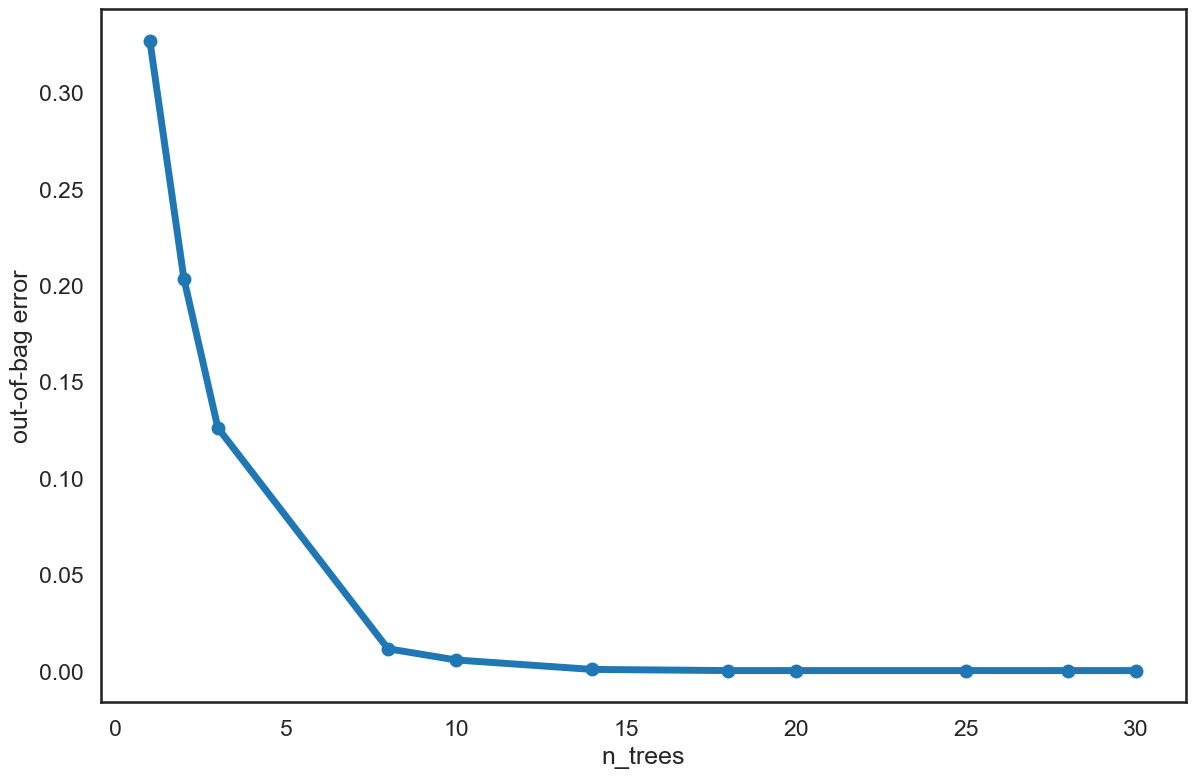

In [31]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend= False,marker = 'o', figsize = (14,9),linewidth = 5)
ax.set(ylabel = 'out-of-bag error');

##Gathering Results 

Here we :
* Select on model that performs well and calculate error matrics and a confusion matrix on the test data set
* Given the distribution of the predicted class which metrics is important 

#Random Forest with 16 estimators

model = RF.set_params(n_estimators = 15)
y_pred = RF.predict(x_test)

In [32]:
#Random Forest with 15 estimators

model = RF.set_params(n_estimators = 18)
y_pred = RF.predict(x_test)


In [33]:
model

RandomForestClassifier(n_estimators=18, n_jobs=-1, oob_score=True,
                       random_state=42, warm_start=True)

In [34]:
joblib.dump(model,'Frandom_forest_model.pkl')

['Frandom_forest_model.pkl']

In [35]:
from sklearn.metrics import classification_report,accuracy_score,precision_score, recall_score
from sklearn.metrics import f1_score,roc_auc_score

cr  = classification_report(y_test, y_pred)
print(cr)
score_df = pd.DataFrame({'accuracy':accuracy_score(y_test,y_pred),
                         'precision':precision_score(y_test,y_pred),
                         'recall':recall_score(y_test,y_pred),
                        'auc': roc_auc_score(y_test,y_pred)},
                        
                        index = pd.Index([0]))

    
print(score_df)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       688
         1.0       1.00      1.00      1.00       712

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

   accuracy  precision  recall  auc
0       1.0        1.0     1.0  1.0


The code first imports various classification metrics from scikit-learn:

* Classification_report: Generates a human-readable classification report that includes precision, recall, F1-score, and support for each class, as well as overall metrics like accuracy.

* Accuracy_score: Calculates the accuracy of the model's predictions.

* Precision_score: Computes the precision, which measures the proportion of true positive predictions among all positive predictions.

* Recall_score: Calculates the recall, which measures the proportion of true positive predictions among all actual positive instances.

* f1_score: Computes the F1-score, which is the harmonic mean of precision and recall and provides a balance between the two.

* roc_auc_score: Computes the Receiver Operating Characteristic Area Under the Curve (ROC AUC) score, which measures the model's ability to distinguish between classes in binary classification problems.

## Examining results 

* Confusion matrix.
* Plot the ROC- AUC and precision-recall curves.
* Plot the feature importances.


## Confusion Matrix:
A confusion matrix is a table used in classification machine learning to evaluate the performance of a model by comparing its predicted outcomes to the actual outcomes.

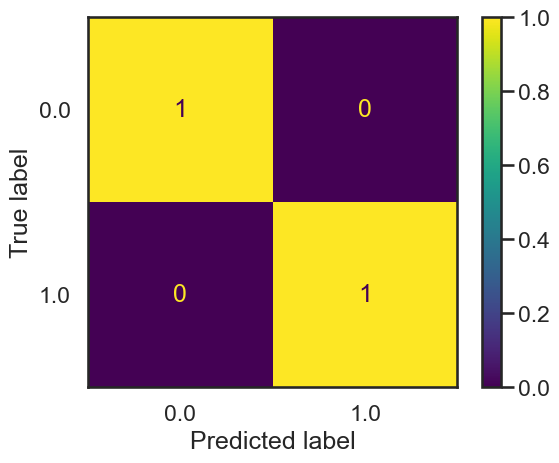

In [36]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix,ConfusionMatrixDisplay

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

The ROC-AUC and precision-recall curves.


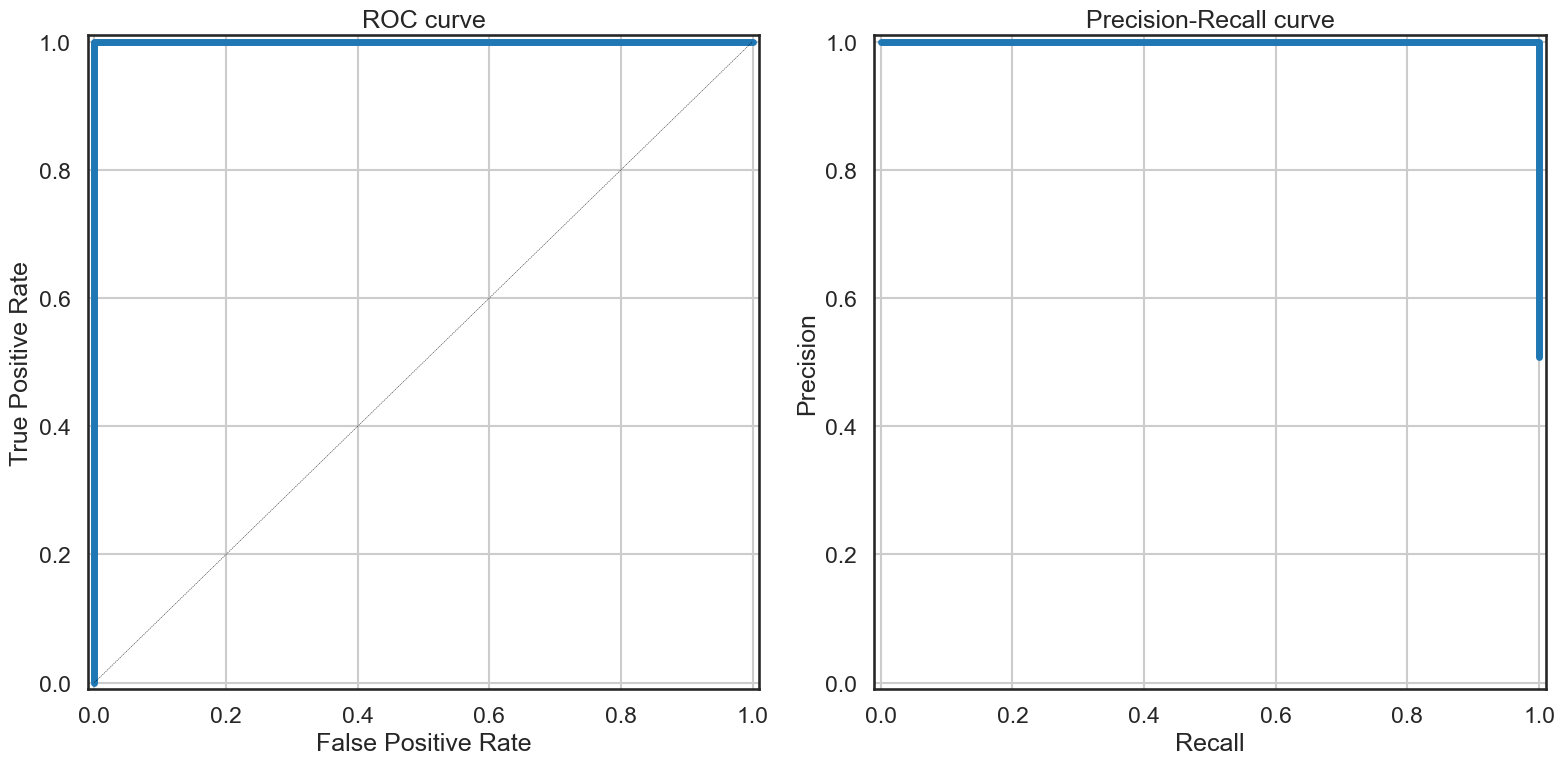

In [37]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(x_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

### ROC curve:
* Sensitivity (recall) at 1.0 means that the model correctly identifies all positive instances without any false negatives.
* Specificity at 1.0 means that the model also correctly identifies all negative instances without any false positives.

### Precision - Recall Curve:

* Horizontal Segment (0,1) to (1,1):

This part of the curve suggests that the model is achieving perfect precision (positive predictive value) across various recall (sensitivity) values. In other words, when it makes a positive prediction, it is always correct (no false positives).

* Vertical Segment (1,1) to (1,0.5):

This part of the curve suggests that, as you increase the recall (sensitivity) towards 100%, the precision suddenly drops to 0.5. This means that when the model tries to capture all positive instances (maximal recall), it starts to make incorrect positive predictions (false positives) at a higher rate, causing the precision to decrease.


## Feature Importance:


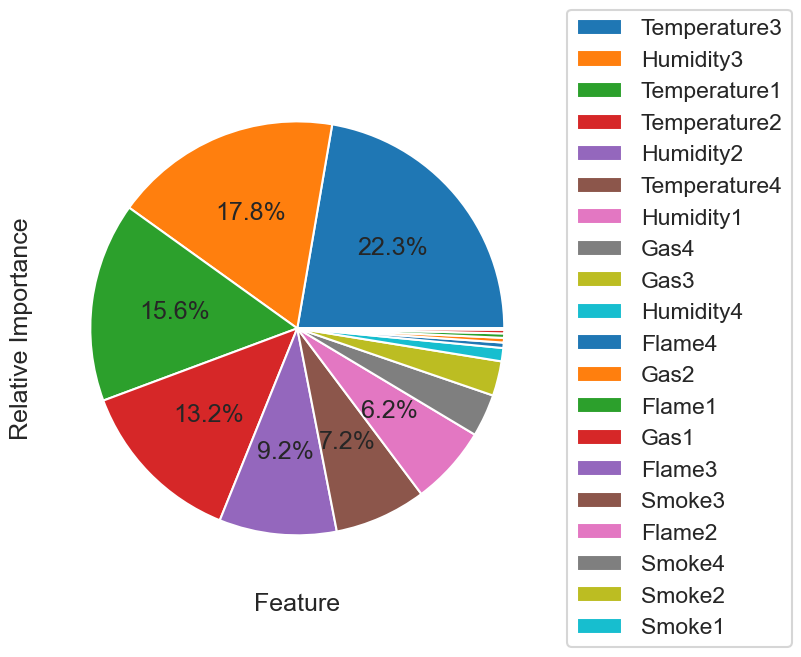

In [38]:
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16, 6))
ax.pie(feature_imp, labels=None, autopct=lambda pct: '{:1.1f}%'.format(pct) if pct > 5.5 else '')
ax.set(ylabel='Relative Importance')
ax.set(xlabel='Feature')

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Move the legend outside the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),labels=feature_imp.index)

plt.show()

In [39]:
from sklearn import metrics
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"trian Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [40]:
print(get_accuracy(x_train, x_test, y_train, y_test, model))

{'test Accuracy': 1.0, 'trian Accuracy': 1.0}


### Using GridSearch CV

GridSearchCV is a technique used in machine learning for hyperparameter tuning, which involves systematically searching for the best combination of hyperparameters for a machine learning model.

In [41]:


# 
from sklearn.model_selection import GridSearchCV

#Hyperparameter tunning
param_grid = {'n_estimators': [2*n+1 for n in range(10)],
             'max_depth' : [2*n+1 for n in range(7) ],
             'max_features':["auto", "sqrt", "log2"]}


search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy', cv=3)
search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=18, n_jobs=-1,
                                              oob_score=True, random_state=42,
                                              warm_start=True),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

In [42]:
search.best_score_

1.0

In [43]:
search.best_params_

{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 1}

In [44]:
model

RandomForestClassifier(n_estimators=18, n_jobs=-1, oob_score=True,
                       random_state=42, warm_start=True)

In [45]:
# search.predict(y_test)

In [46]:
y_pred

array([1., 0., 0., ..., 0., 0., 1.])

In [47]:

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


print(comparison_df)


      Actual  Predicted
658      1.0        1.0
4555     0.0        0.0
4402     0.0        0.0
2492     1.0        1.0
1791     1.0        1.0
4363     1.0        1.0
3672     0.0        0.0
4234     0.0        0.0
4213     1.0        1.0
4541     0.0        0.0
1116     1.0        1.0
3388     0.0        0.0
2702     1.0        1.0
311      1.0        1.0
3028     0.0        0.0
788      1.0        1.0
3331     0.0        0.0
3483     1.0        1.0
2297     1.0        1.0
4397     1.0        1.0
4178     1.0        1.0
3636     1.0        1.0
3281     1.0        1.0
3454     0.0        0.0
460      0.0        0.0
4639     0.0        0.0
507      1.0        1.0
512      0.0        0.0
4203     0.0        0.0
716      1.0        1.0
1999     0.0        0.0
1709     1.0        1.0
2844     0.0        0.0
2496     0.0        0.0
1235     1.0        1.0
2043     1.0        1.0
2186     1.0        1.0
2432     1.0        1.0
2972     0.0        0.0
1330     1.0        1.0
3180     1.0    

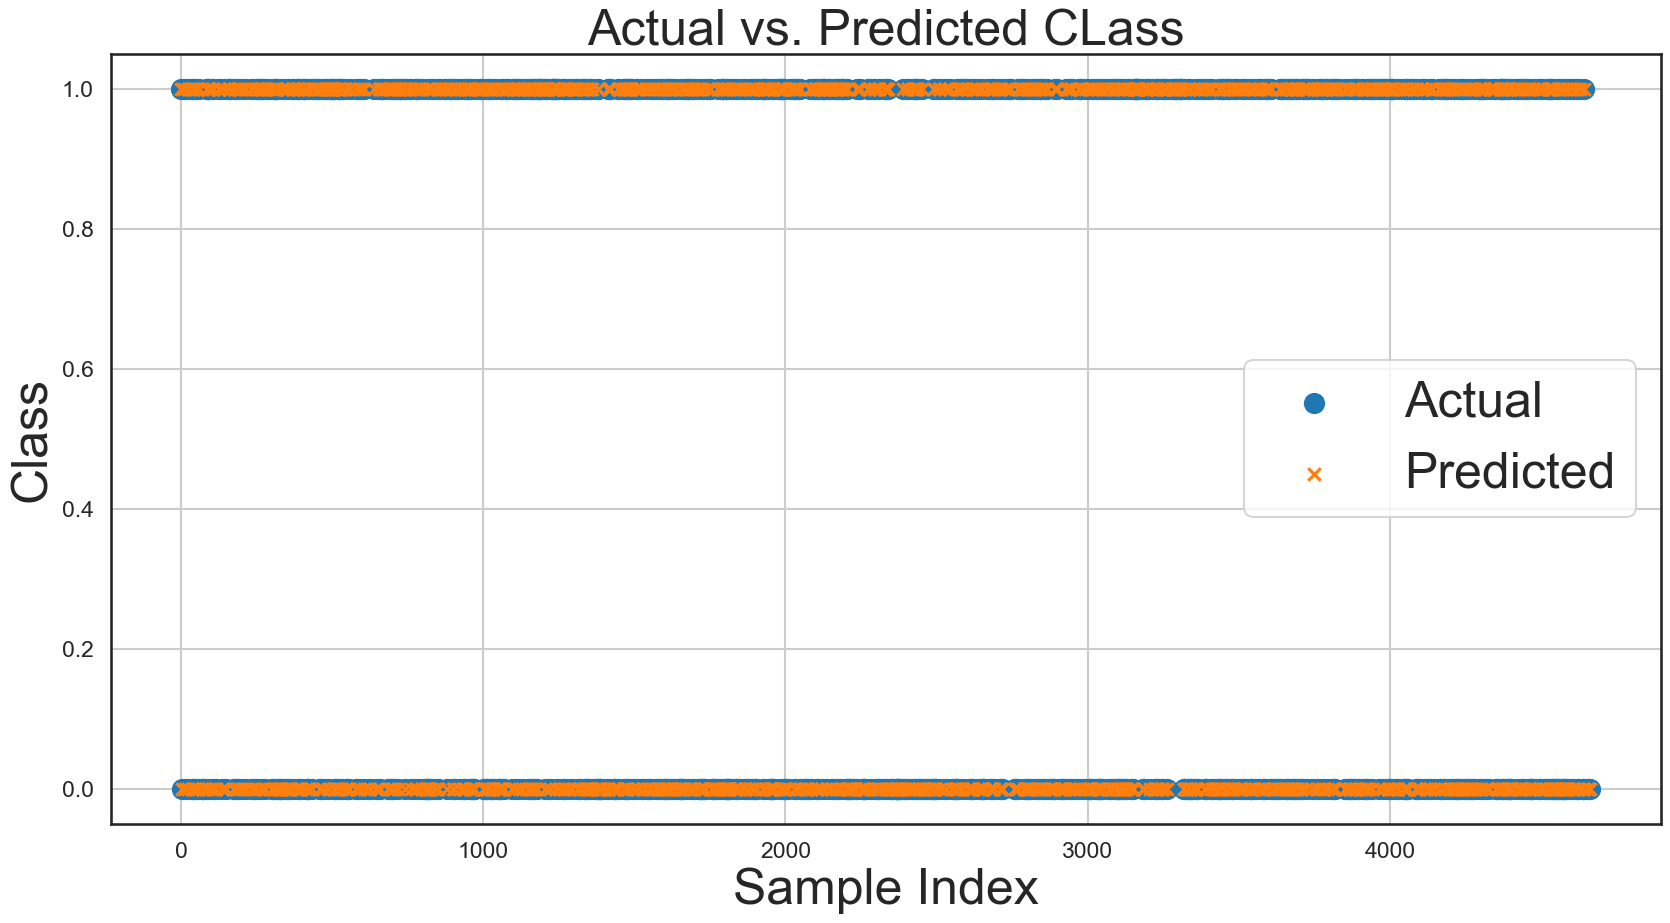

Different values:
Empty DataFrame
Columns: [Actual, Predicted]
Index: []


In [48]:
# Plot the actual and predicted values
plt.figure(figsize=(20, 10))
plt.scatter(comparison_df.index, comparison_df['Actual'], label='Actual', marker='o',s = 190)
plt.scatter(comparison_df.index, comparison_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Sample Index',fontsize = 36)
plt.ylabel('Class',fontsize = 36)
plt.legend(fontsize = 36)
plt.title('Actual vs. Predicted CLass',fontsize = 36)
plt.grid(True)
plt.show()

# Find the indices where actual and predicted values are different
different_indices = comparison_df[comparison_df['Actual'] != comparison_df['Predicted']].index

# Get the actual and predicted values that are different
different_values = comparison_df.loc[different_indices]

# Print the different values
print("Different values:")
print(different_values)


In [49]:
different_indices = comparison_df[comparison_df['Actual'] != comparison_df['Predicted']].index

# Get the actual and predicted values that are different
different_values = comparison_df.loc[different_indices]

# Print the different values
print("Different values:")
print(different_values)


Different values:
Empty DataFrame
Columns: [Actual, Predicted]
Index: []
